In [122]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%pwd

'/content'

In [ ]:
# Clean image directories and files
# !rm ./datasets/agv/forward/*.*
# !rm ./datasets/agv/left/*.*
# !rm ./datasets/agv/right/*.*
# !rm ./datasets/agv/*.*
# !rmdir ./datasets/agv/*
# !rm ./datasets/*.*
# !rmdir ./datasets/*
# !rmdir ./datasets

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/agv

In [ ]:
%ls drive/MyDrive/data

agv_images_02_ak.zip  agv_images_02.zip  agv_train_images1.zip  cats_and_dogs.zip


In [ ]:
# !cp -r /content/drive/MyDrive/data/agv_images.zip /content/datasets
# !cp -r /content/drive/MyDrive/data/agv_images_02.zip /content/datasets
!cp -r /content/drive/MyDrive/data/agv_images_02_ak.zip /content/datasets

In [ ]:
# !unzip /content/datasets/agv_images.zip -d /content/datasets/agv
# !unzip /content/datasets/agv_images_02.zip -d /content/datasets/agv
!unzip /content/datasets/agv_images_02_ak.zip -d /content/datasets/agv

Archive:  /content/datasets/agv_images_02_ak.zip
  inflating: /content/datasets/agv/forward/1710655446.425585.png  
  inflating: /content/datasets/agv/forward/1710655446.571130.png  
  inflating: /content/datasets/agv/forward/1710655446.739303.png  
  inflating: /content/datasets/agv/forward/1710655446.969517.png  
  inflating: /content/datasets/agv/forward/1710655447.119659.png  
  inflating: /content/datasets/agv/forward/1710655447.284593.png  
  inflating: /content/datasets/agv/forward/1710655447.444420.png  
  inflating: /content/datasets/agv/forward/1710655447.642365.png  
  inflating: /content/datasets/agv/forward/1710655447.808154.png  
  inflating: /content/datasets/agv/forward/1710655447.965677.png  
  inflating: /content/datasets/agv/forward/1710655448.101489.png  
  inflating: /content/datasets/agv/forward/1710655448.268513.png  
  inflating: /content/datasets/agv/forward/1710655448.387845.png  
  inflating: /content/datasets/agv/forward/1710655448.529991.png  
  inflating: 

In [135]:
import os
import csv
import glob2

dirname = "C:/Myagvcobot/data_2"
f_csv = open(os.path.join(dirname, "0_road_labels.csv"),'w', newline='')
wr = csv.writer(f_csv)
wr.writerow(["file","label"])

#names = ['forward', 'right', 'left', 'forward']
names = ['forward', 'right', 'left']
# names = ['forward', 'right', 'left']
# names = ['forward', 'right', 'left', 'left2', 'left3']


os.chdir(dirname)

i=0
for name in names:
    files = glob2.glob(os.path.join(name, "*.png"))
    for file in files:
        wr.writerow([file,str(i)])
        f_csv.flush()
    i=i+1
    #print(i)

'''
files = glob('forward/*.png')
for file in files:
    wr.writerow([file,'0'])
    f_csv.flush()

files = glob('right/*.png')
for file in files:
    wr.writerow([file,'2'])
    f_csv.flush()

files = glob('left/*.png')
for file in files:
    wr.writerow([file,'2'])
    f_csv.flush()
'''

os.chdir(dirname)

In [ ]:
!pwd

/content


In [ ]:
'''
from glob import glob
files = glob('/content/datasets/agv/forward/*.png')
label =3
with open('output_file', 'w') as f:
    # 파일마다 작업 수행
    for file in files:
        # 파일명과 콤마를 파일에 쓰기
        f.write(file + ', ')

        # 입력된 변수 값을 파일에 쓰기
        f.write(str(label) + '\n')
        #f.write('\n')
'''

In [ ]:
!pip list | grep keras

'grep'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


#1 수집한 데이터 불러오기

In [124]:
# from tensorflow.keras.preprocessing import image as keras_image
import keras.utils as keras_image
import os
import numpy as np
from tqdm import tqdm
from PIL import ImageFile
import pandas as pd

dirname = "C:/Myagvcobot/data_2"

def image_to_tensor(img_path):
	img = keras_image.load_img(
		os.path.join(dirname, img_path),
		target_size=(120,160))
	x = keras_image.img_to_array(img)
	return np.expand_dims(x, axis=0)

def data_to_tensor(img_paths):
	list_of_tensors = [
		image_to_tensor(img_path) for img_path in tqdm(img_paths)]
	return np.vstack(list_of_tensors)

ImageFile.LOAD_TRUNCATED_IMAGES = True
# Load the data
data = pd.read_csv(os.path.join(dirname, "0_road_labels.csv"))

files = data['file']
targets = data['label'].values

tensors = data_to_tensor(files)

print(data.tail())
print(tensors.shape)
print(targets.shape)

  0%|          | 0/443 [00:00<?, ?it/s]

100%|██████████| 443/443 [00:04<00:00, 109.84it/s]


                           file  label
438  left\1713165633.005347.png      2
439  left\1713165635.461003.png      2
440  left\1713165635.683487.png      2
441  left\1713165635.852697.png      2
442  left\1713165644.674244.png      2
(443, 120, 160, 3)
(443,)


#2 수집한 이미지 출력해 보기

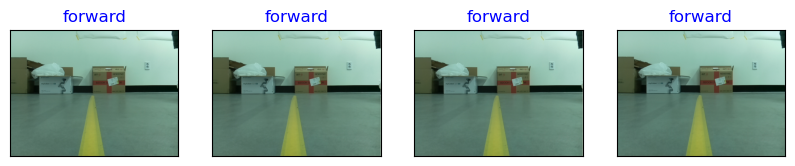

In [125]:
import cv2
import matplotlib.pyplot as plt

# Name list
names = ['forward', 'right', 'left']
# names = ['forward', 'right', 'left']


def display_images(img_path, ax):
	img = cv2.imread(os.path.join(dirname, img_path))
	ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

fig = plt.figure(figsize=(10, 3))
for i in range(4):
	ax = fig.add_subplot(1, 4, i + 1, xticks=[], yticks=[])
	ax.set_title(names[targets[i+4]], color='blue')
	display_images(files[i+4], ax)
plt.show()

#3 훈련, 검증, 시험 데이터 분리하기

In [126]:
# from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

tensors = tensors.reshape(-1,120,160,3)
print(tensors.shape)

tensors = tensors.astype('float32')/255
# targets = to_categorical(targets, 3)
targets = to_categorical(targets, 3)

x_train, x_test, y_train, y_test = train_test_split(
		tensors,
		targets,
		test_size = 0.2,
		random_state = 1)

n = int(len(x_test)/2)
x_valid, y_valid = x_test[:n], y_test[:n]
x_test, y_test = x_test[n:], y_test[n:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

(443, 120, 160, 3)
(354, 120, 160, 3) (354, 3)
(45, 120, 160, 3) (45, 3)
(44, 120, 160, 3) (44, 3)


#4 인공신경망 학습시키기

## 모델 만들기

In [127]:
import tensorflow as tf

model = tf.keras.Sequential([ #donkey car CNN
	tf.keras.layers.Conv2D(24, (5, 5), strides=(2, 2), padding="same",
		activation='relu', input_shape=x_train.shape[1:]),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.Conv2D(32, (5, 5), strides=(2, 2), padding="same",
		activation='relu'),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same",
		activation='relu'),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(100,activation='relu'),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.Dense(50,activation='relu'),
	tf.keras.layers.Dropout(0.2),
	# tf.keras.layers.Dense(3,activation='softmax')
 	tf.keras.layers.Dense(3,activation='softmax')
])

## 모델 summary

In [128]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 60, 80, 24)        1824      
                                                                 
 dropout_70 (Dropout)        (None, 60, 80, 24)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 30, 40, 32)        19232     
                                                                 
 dropout_71 (Dropout)        (None, 30, 40, 32)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 15, 20, 64)        51264     
                                                                 
 dropout_72 (Dropout)        (None, 15, 20, 64)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 15, 20, 64)      

## plot model

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## 모델 컴파일

In [129]:
model.compile(loss='categorical_crossentropy',
		optimizer='adam', metrics=['accuracy'])

## call back 설정

In [130]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard
check_point_cb = ModelCheckpoint('keras_agv_model123.h5',save_best_only=True)
#check_point_cb = ModelCheckpoint('keras_agv_model.h5',save_best_only=False)
early_stopping_cb = EarlyStopping(patience=20, monitor='val_loss',
                                  restore_best_weights=True)

## 학습

In [131]:
import h5py

history = model.fit(x_train, y_train, epochs=40,
                    validation_data=(x_valid, y_valid),
                    callbacks=[check_point_cb,early_stopping_cb])

Epoch 1/40
12/12 [==============================] - 2s 97ms/step - loss: 0.9149 - accuracy: 0.4972 - val_loss: 0.8342 - val_accuracy: 0.5909
Epoch 2/40
12/12 [==============================] - 1s 48ms/step - loss: 0.7993 - accuracy: 0.6073 - val_loss: 0.8305 - val_accuracy: 0.5909
Epoch 3/40
12/12 [==============================] - 0s 40ms/step - loss: 0.7993 - accuracy: 0.5791 - val_loss: 0.7818 - val_accuracy: 0.5909
Epoch 4/40
12/12 [==============================] - 0s 27ms/step - loss: 0.8073 - accuracy: 0.6045 - val_loss: 0.8371 - val_accuracy: 0.5909
Epoch 5/40
12/12 [==============================] - 0s 36ms/step - loss: 0.8154 - accuracy: 0.6073 - val_loss: 0.7700 - val_accuracy: 0.5909
Epoch 6/40
12/12 [==============================] - 0s 27ms/step - loss: 0.8088 - accuracy: 0.6186 - val_loss: 0.7826 - val_accuracy: 0.5909
Epoch 7/40
12/12 [==============================] - 0s 39ms/step - loss: 0.7864 - accuracy: 0.6045 - val_loss: 0.7662 - val_accuracy: 0.5909
Epoch 8/40
12

## 그래프 그리기

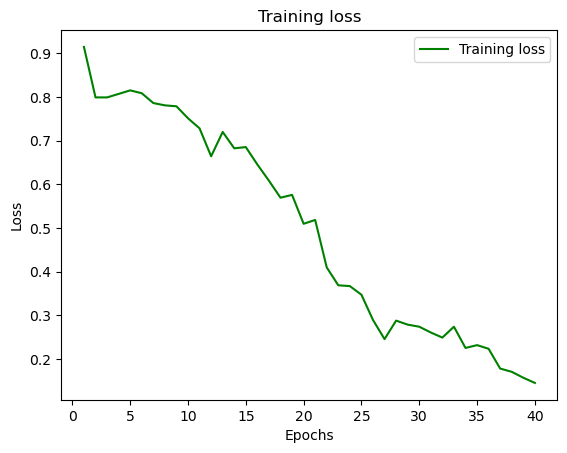

In [132]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

model.save("keras_agv_model123.h5")

#5 시험 데이터로 확인해 보기

In [133]:
# from tensorflow.keras.models import load_model
from keras.models import load_model

model1 = load_model('keras_agv_model123.h5')

print(x_test.shape)
# Model predictions for the testing dataset
y_test_predict = model1.predict(x_test)
print(y_test_predict.shape, y_test_predict[0])
y_test_predict = np.argmax(y_test_predict,axis=1)
print(y_test_predict.shape, y_test_predict[0])

(45, 120, 160, 3)
2/2 [==============================] - 0s 31ms/step
(45, 3) [6.8632502e-04 9.9776268e-01 1.5509777e-03]
(45,) 1


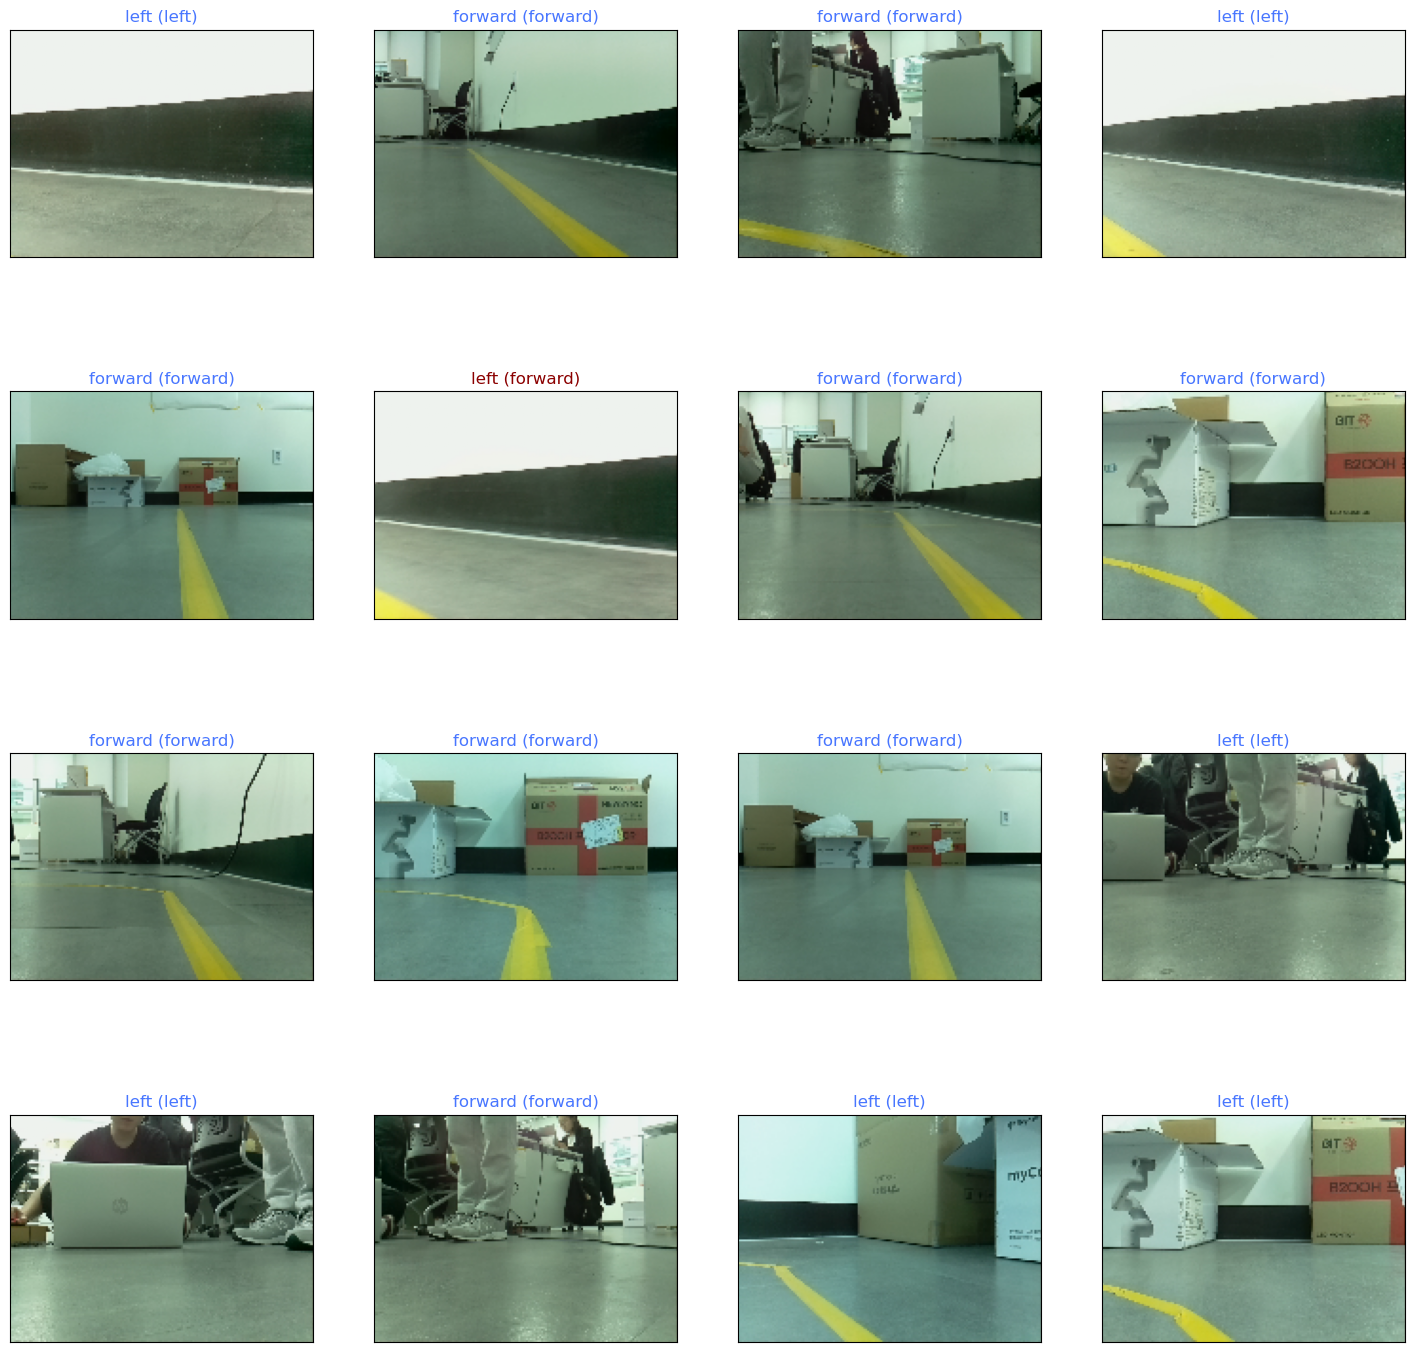

In [134]:
# Display true labels and predictions
fig = plt.figure(figsize=(18, 18))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16,
                        replace=False)):
	ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
	ax.imshow(np.squeeze(x_test[idx]))
	pred_idx = y_test_predict[idx]
	true_idx = np.argmax(y_test[idx])
	ax.set_title("{} ({})".format(names[pred_idx], names[true_idx]),
		color=("#4876ff" if pred_idx == true_idx else "darkred"))
plt.show()

# 샘플 데이터셋

https://drive.google.com/file/d/1g5KZMmFh21q6V3YZmevzKtI6ultSLlo1/view?usp=drive_link